In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of missing values in each column
print(planes.isna().sum())

# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05
print(planes.isna().sum()<= threshold)
# Create a filter
cols_to_drop = planes.columns[planes.isna().sum()<= threshold]
print(cols_to_drop)

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())


# Check the values of the Additional_Info column
print(planes['Additional_Info'])
print(planes['Additional_Info'].value_counts())


# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, y='Price', x='Airline')

plt.show()

# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")
print(non_numeric)
# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())


# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"


# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()



# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(x='Duration',data=planes)
plt.show()

# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

# Median Duration by Airline

planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline", "airline_median_duration"]].value_counts())

# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())


# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

# Display descriptive statistics for flight duration
print(planes['Duration'].describe())


# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

0    12h
1    23h
2    10h
3    34h
4    25h
Name: Duration, dtype: object


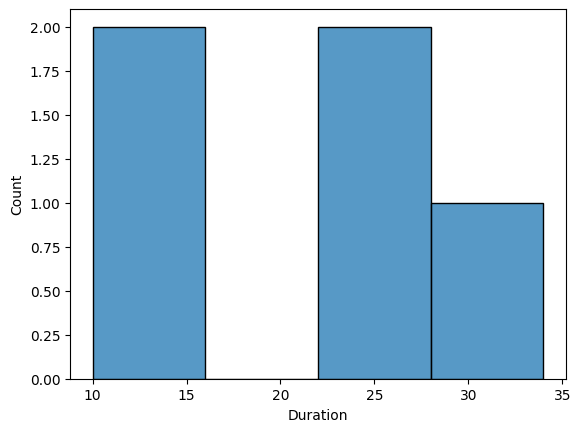

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    "Duration": ["12h", "23h", "10h", "34h", "25h"],
    "Flight": ['A', 'B', 'C', 'D', 'E']
}
planes = pd.DataFrame(data)

# Preview the column
print(planes["Duration"].head())

# Convert the Duration column to string type
planes["Duration"] = planes["Duration"].astype(str)

# Remove the 'h' character
planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
planes["Duraaation"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(x='Duraaation', data=planes)
plt.show()
